<a href="https://colab.research.google.com/github/dcVictor/Optativa-I-MachineLearning/blob/main/Optativa_PAVAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Etapa 1: Carregamento e Inspeção Inicial ---

Dimensões do DataFrame (shape):
(66540, 15)

Informações do DataFrame (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66540 entries, 0 to 66539
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    66540 non-null  object 
 1   S1_1         66540 non-null  float64
 2   S1_2         66540 non-null  float64
 3   S1_3         66540 non-null  float64
 4   S1_4         66540 non-null  float64
 5   S1_5         66540 non-null  float64
 6   S1_6         66540 non-null  float64
 7   S2_1         66540 non-null  float64
 8   S2_2         66540 non-null  float64
 9   S3_1         66540 non-null  float64
 10  S3_2         66540 non-null  float64
 11  S4_1         66540 non-null  float64
 12  S4_2         66540 non-null  float64
 13  Nivel_agua   66540 non-null  float64
 14  Nivel_total  66540 non-null  float64
dtypes: float64(14), object(1)
memory usage: 7.6+

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1400x1200 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

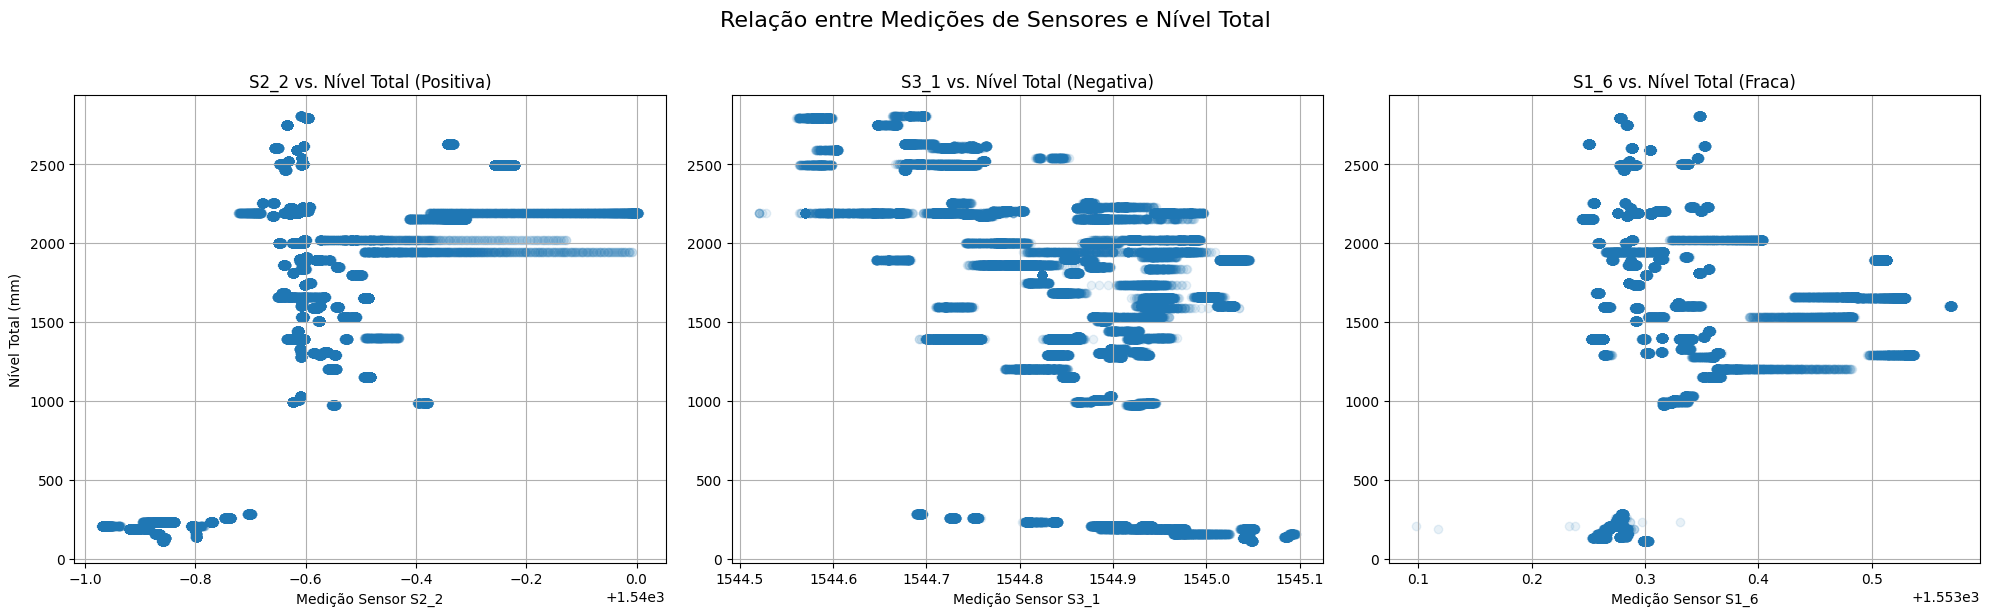

In [1]:
# ---------------------------------------------------------------------------
# Atividade 1: Análise Exploratória de Dados (EDA)
# ---------------------------------------------------------------------------

# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Etapa 1: Carregamento e Inspeção Inicial ---
print("--- Etapa 1: Carregamento e Inspeção Inicial ---")

# Carrega o conjunto de dados a partir de um arquivo CSV
df = pd.read_csv('df_full.csv')

# Exibe as dimensões (linhas, colunas) do DataFrame
print("\nDimensões do DataFrame (shape):")
print(df.shape)

# Mostra um resumo técnico, incluindo tipos de dados e valores não nulos
print("\nInformações do DataFrame (info):")
df.info()

# Exibe as primeiras 5 linhas para uma inspeção visual dos dados
print("\nPrimeiras 5 linhas do DataFrame (head):")
print(df.head())


# --- Etapa 2: Resumo Estatístico ---
print("\n--- Etapa 2: Resumo Estatístico ---")

# Calcula e exibe estatísticas descritivas (média, desvio padrão, quartis, etc.)
print(df.describe())


# --- Etapa 3: Verificação de Valores Ausentes e Duplicados ---
print("\n--- Etapa 3: Verificação de Valores Ausentes e Duplicados ---")

# Conta o número de valores ausentes (NaN) em cada coluna
print("\nSoma de valores ausentes por coluna:")
print(df.isna().sum())

# Conta o número total de linhas duplicadas no DataFrame
print("\nSoma de linhas duplicadas:")
print(df.duplicated().sum())


# --- Etapa 4: Análise da Distribuição das Variáveis ---
print("\n--- Etapa 4: Gerando gráficos de distribuição ---")

# Seleciona algumas colunas de sensores e as variáveis-alvo para visualização
sensor_cols = ['S1_1', 'S2_1', 'S3_1', 'S4_1', 'S4_2']
target_cols = ['Nivel_agua', 'Nivel_total']

# Gera e salva histogramas para os sensores selecionados
df[sensor_cols].hist(bins=50, figsize=(15, 10))
plt.suptitle('Histogramas de Distribuição para Sensores Selecionados', y=1.02, size=16)
plt.tight_layout()
plt.savefig('histogramas_sensores.png')
plt.clf()  # Limpa a figura atual para o próximo gráfico

# Gera e salva histogramas para as variáveis-alvo
df[target_cols].hist(bins=50, figsize=(15, 5))
plt.suptitle('Histogramas de Distribuição para Variáveis-Alvo', y=1.02, size=16)
plt.tight_layout()
plt.savefig('histogramas_niveis.png')
plt.clf()

# Gera e salva boxplots para os sensores para identificar outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[sensor_cols])
plt.title('Boxplots para Sensores Selecionados', size=16)
plt.xticks(rotation=45)
plt.savefig('boxplots_sensores.png')
plt.clf()

# Gera e salva boxplots para as variáveis-alvo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[target_cols])
plt.title('Boxplots para Variáveis-Alvo', size=16)
plt.savefig('boxplots_niveis.png')
plt.clf()
print("Gráficos de distribuição salvos com sucesso!")


# --- Etapa 5: Análise de Correlação ---
print("\n--- Etapa 5: Gerando heatmap de correlação ---")

# Seleciona todas as colunas numéricas para a análise de correlação
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Gera e salva um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Heatmap de Correlação entre Sensores e Variáveis-Alvo', size=16)
plt.savefig('heatmap_correlacao.png')
plt.clf()
print("Heatmap de correlação salvo com sucesso!")

# Exibe a correlação de todas as variáveis com as variáveis-alvo, ordenado
print("\nCorrelação com Nivel_agua e Nivel_total:")
print(correlation_matrix[['Nivel_agua', 'Nivel_total']].sort_values(by='Nivel_total', ascending=False))


# --- Etapa 6: Análise Temporal ---
print("\n--- Etapa 6: Gerando gráficos de séries temporais ---")

# Cria uma cópia do DataFrame para manipulação segura
df_temp = df.copy()

# Converte a coluna 'Timestamp' de texto para o formato datetime
df_temp['Timestamp'] = pd.to_datetime(df_temp['Timestamp'], format='%d/%m/%Y %H:%M:%S.%f')

# Define a coluna 'Timestamp' como o índice do DataFrame
df_temp.set_index('Timestamp', inplace=True)

# Seleciona os sensores mais relevantes para a plotagem temporal
sensores_para_plotar = ['S2_1', 'S2_2', 'S3_1', 'S4_2']

# Plota e salva a série temporal dos sensores selecionados
plt.figure(figsize=(15, 8))
for sensor in sensores_para_plotar:
    plt.plot(df_temp.index, df_temp[sensor], label=sensor, alpha=0.7)
plt.legend()
plt.title('Séries Temporais de Sensores Selecionados', size=16)
plt.xlabel('Timestamp')
plt.ylabel('Medição do Sensor')
plt.savefig('series_temporais_sensores.png')
plt.clf()

# Plota e salva a série temporal das variáveis-alvo
plt.figure(figsize=(15, 8))
plt.plot(df_temp.index, df_temp['Nivel_agua'], label='Nível de Água')
plt.plot(df_temp.index, df_temp['Nivel_total'], label='Nível Total')
plt.legend()
plt.title('Séries Temporais - Nível de Água e Nível Total', size=16)
plt.xlabel('Timestamp')
plt.ylabel('Nível (mm)')
plt.savefig('series_temporais_niveis.png')
plt.clf()
print("Gráficos de séries temporais salvos com sucesso!")


# --- Etapa 7: Relação com as Variáveis-Alvo (Scatter Plots) ---
print("\n--- Etapa 7: Gerando gráficos de dispersão (scatter plots) ---")

# Cria uma figura com 3 subplots para comparar diferentes relações
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Relação entre Medições de Sensores e Nível Total', fontsize=16, y=1.02)

# Gráfico 1: Sensor com forte correlação positiva
axes[0].scatter(df['S2_2'], df['Nivel_total'], alpha=0.1)
axes[0].set_title('S2_2 vs. Nível Total (Positiva)')
axes[0].set_xlabel('Medição Sensor S2_2')
axes[0].set_ylabel('Nível Total (mm)')
axes[0].grid(True)

# Gráfico 2: Sensor com forte correlação negativa
axes[1].scatter(df['S3_1'], df['Nivel_total'], alpha=0.1)
axes[1].set_title('S3_1 vs. Nível Total (Negativa)')
axes[1].set_xlabel('Medição Sensor S3_1')
axes[1].grid(True)

# Gráfico 3: Sensor com correlação fraca
axes[2].scatter(df['S1_6'], df['Nivel_total'], alpha=0.1)
axes[2].set_title('S1_6 vs. Nível Total (Fraca)')
axes[2].set_xlabel('Medição Sensor S1_6')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('scatter_plots_relacao.png')
print("Gráfico de dispersão salvo com sucesso!")

print("\n--- Análise Concluída ---")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')